In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import io
import bs4 as bs
import urllib.request

In [2]:
pd.set_option('display.max.columns', 50)
pd.set_option('display.max.rows', 1000)

In [4]:
BASE_URL = "http://rotoguru1.com/cgi-bin/fyday.pl?week=WEEK&game=dk&scsv=1&year=YEAR"
WEEKS = range(1,18)
YEARS = range(2014,2018)

In [5]:
df_scrape = pd.DataFrame()
for wk in list(map(str,WEEKS)):
    for yr in list(map(str, YEARS)):
        url = urllib.request.urlopen("http://rotoguru1.com/cgi-bin/fyday.pl?week="+wk+"&game=dk&scsv=1&year="+yr).read()
        soup = bs.BeautifulSoup(url, "lxml")
        week_scrape = pd.read_csv(io.StringIO(soup.find("pre").text),sep=';')
        df_scrape = pd.concat([df_scrape, week_scrape])
df_scrape.head()

,Week,Year,GID,Name,Pos,Team,h/a,Oppt,DK points,DK salary
0,1,2014,1301,"Ryan, Matt",QB,atl,h,nor,34.42,7900.0
1,1,2014,1340,"Stafford, Matthew",QB,det,h,nyg,33.04,9000.0
2,1,2014,1409,"Luck, Andrew",QB,ind,a,den,31.70,8300.0
3,1,2014,1207,"Palmer, Carson",QB,ari,h,sdg,25.06,7500.0
4,1,2014,1263,"Cutler, Jay",QB,chi,h,buf,22.96,7800.0


In [29]:
df_scrape[(df_scrape['Oppt'] == 'nor') & (df_scrape['Pos'] == 'QB') & (df_scrape['Year'] == 2017)]

,Week,Year,GID,Name,Pos,Team,h/a,Oppt,DK points,DK salary
1,1,2017,1344,"Bradford, Sam",QB,min,h,nor,28.54,5900.0
0,2,2017,1131,"Brady, Tom",QB,nwe,a,nor,33.78,7900.0
26,3,2017,1378,"Newton, Cam",QB,car,h,nor,11.28,6600.0
32,3,2017,1239,"Anderson, Derek",QB,car,h,nor,0.68,5400.0
30,4,2017,1263,"Cutler, Jay",QB,mia,h,nor,6.06,5800.0
4,6,2017,1340,"Stafford, Matthew",QB,det,a,nor,22.88,6500.0
18,7,2017,1470,"Hundley, Brett",QB,gnb,h,nor,12.88,5100.0
21,8,2017,1519,"Trubisky, Mitchell",QB,chi,a,nor,10.86,4600.0
23,9,2017,1242,"Fitzpatrick, Ryan",QB,tam,a,nor,9.72,4800.0
26,9,2017,1465,"Winston, Jameis",QB,tam,a,nor,3.48,5800.0


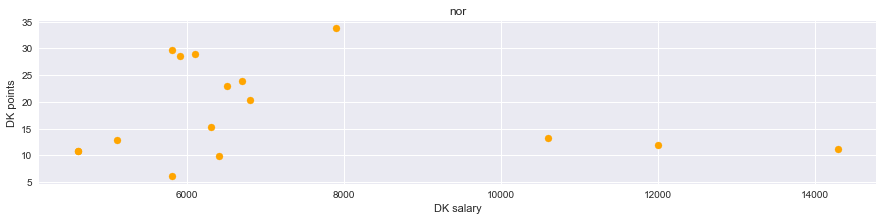

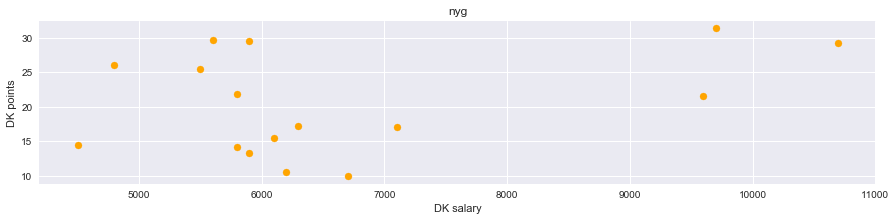

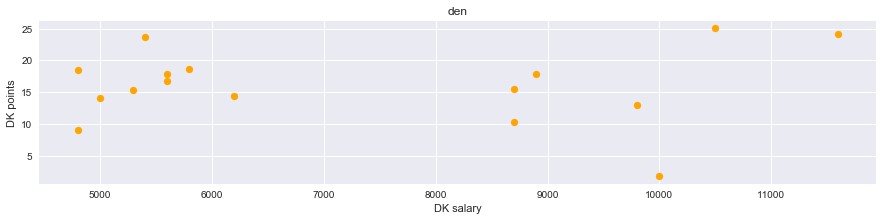

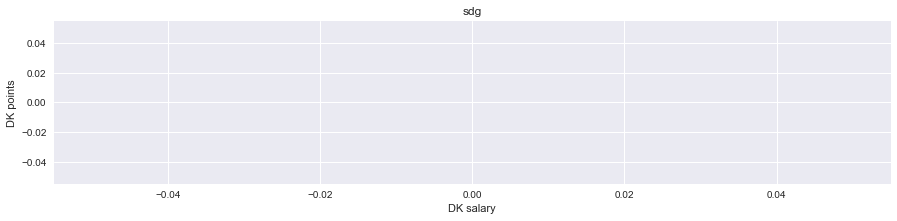

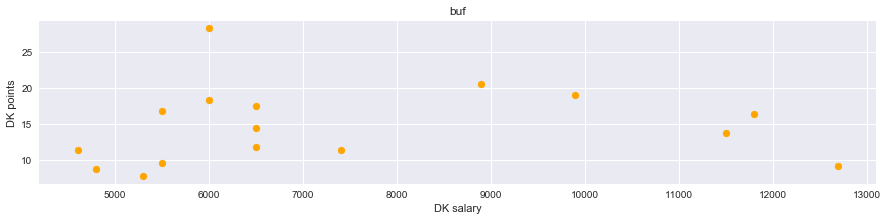

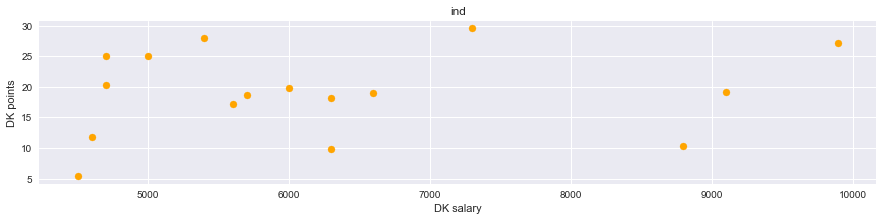

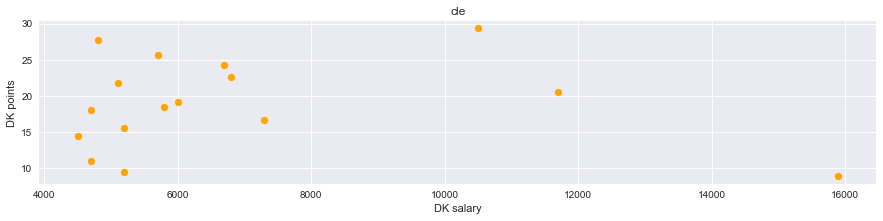

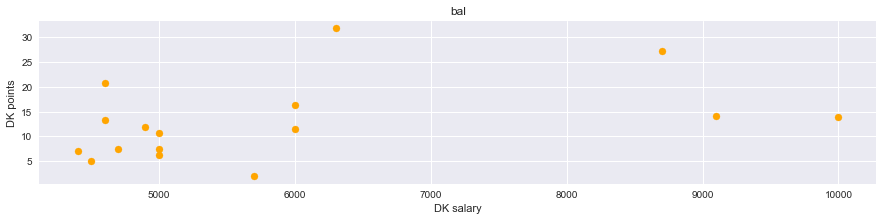

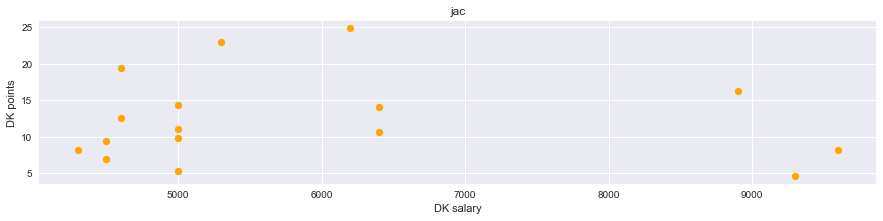

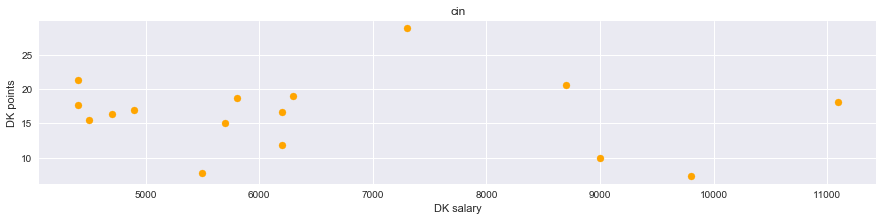

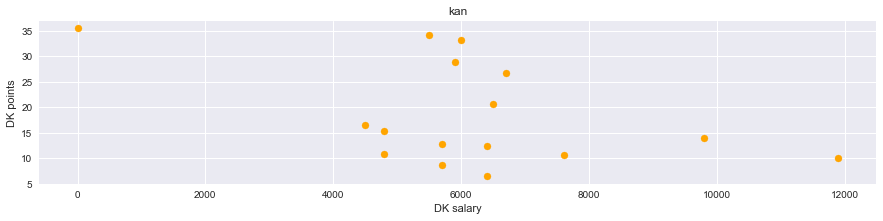

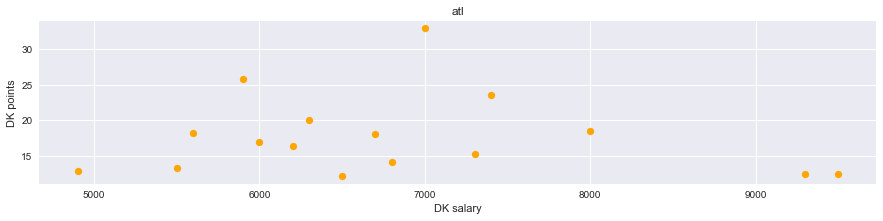

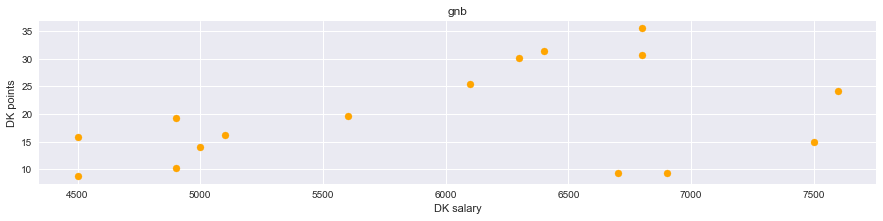

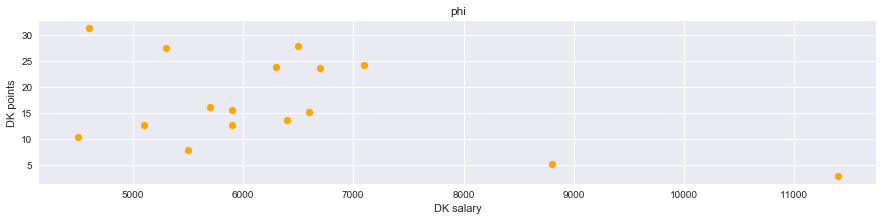

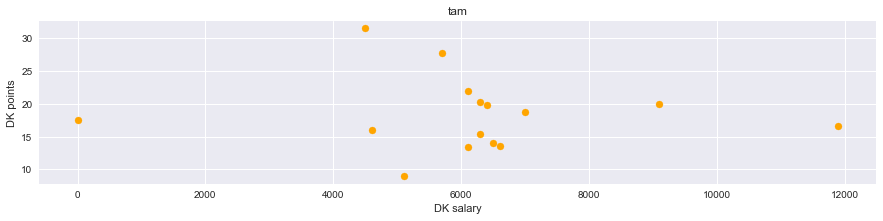

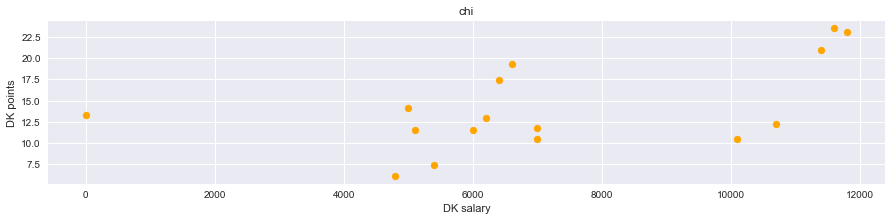

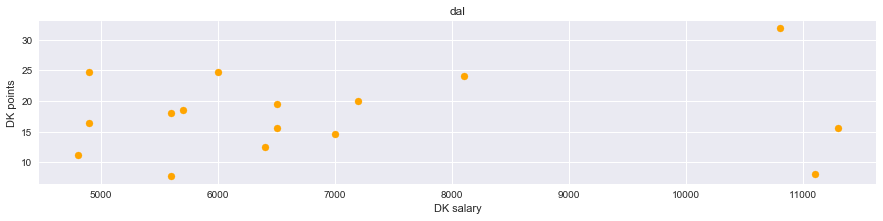

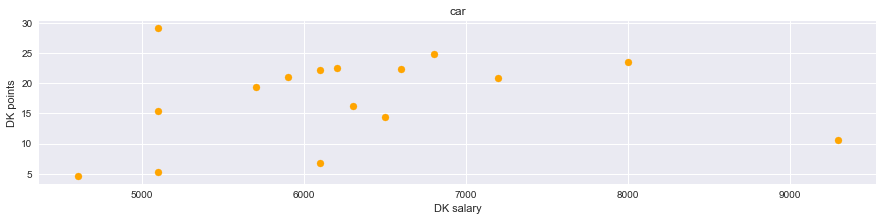

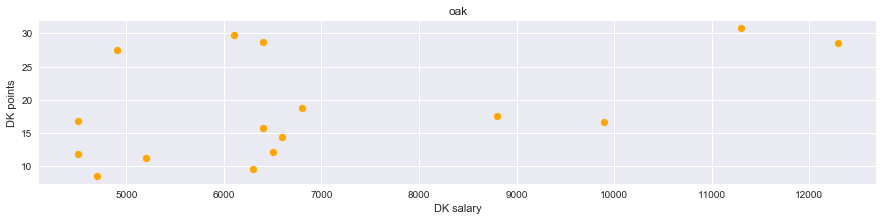

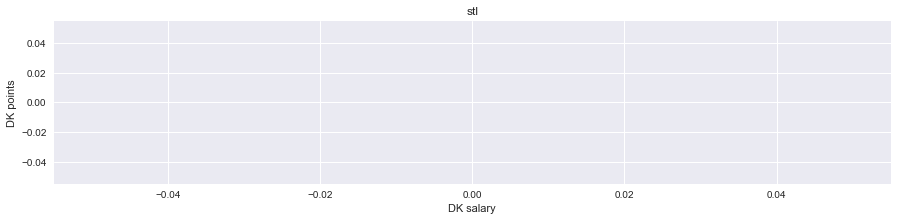

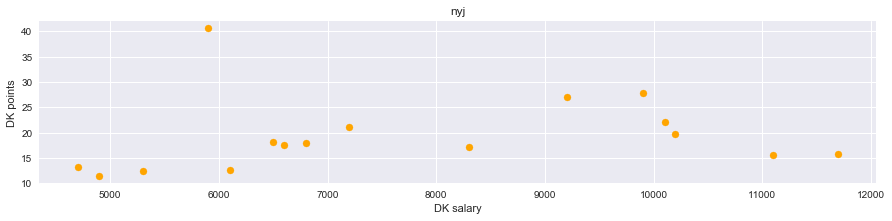

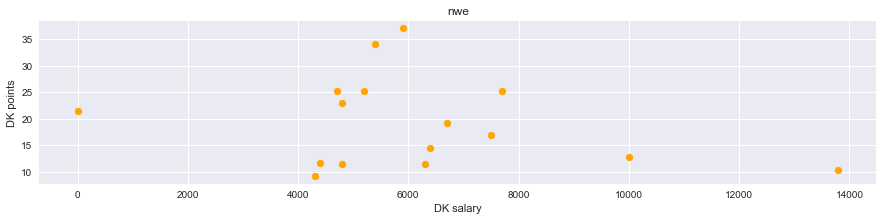

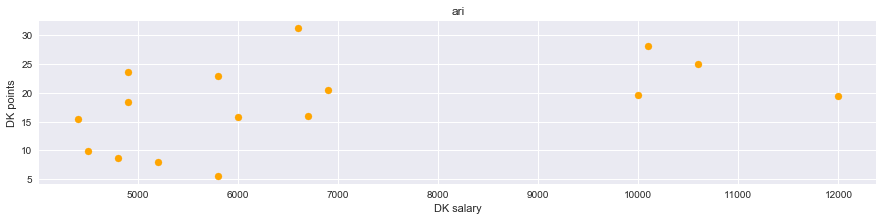

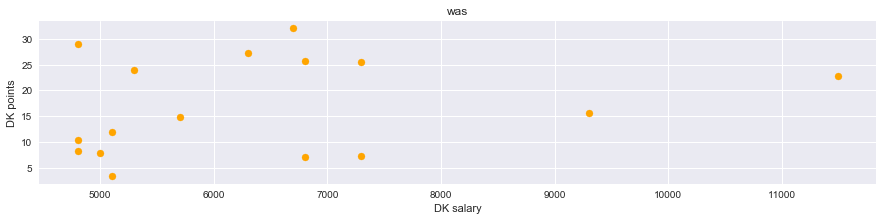

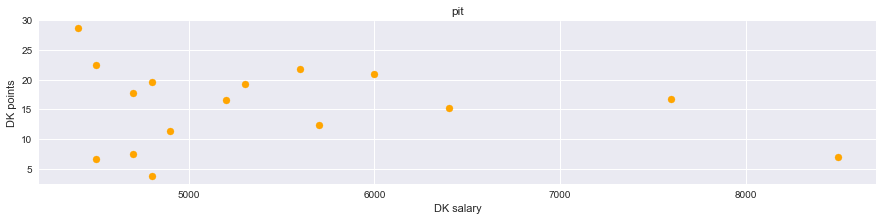

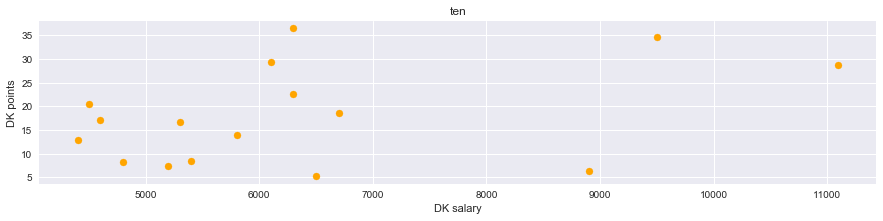

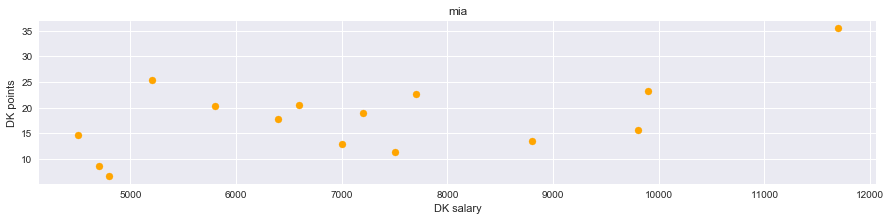

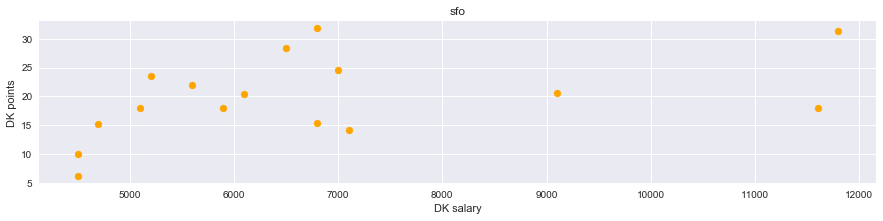

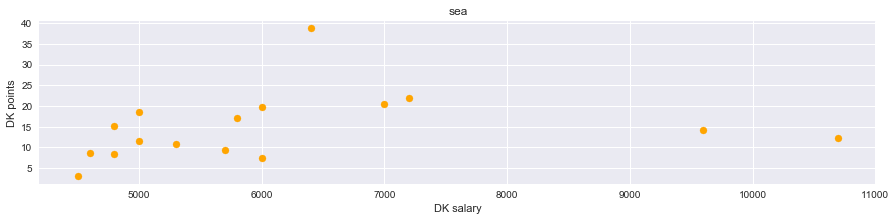

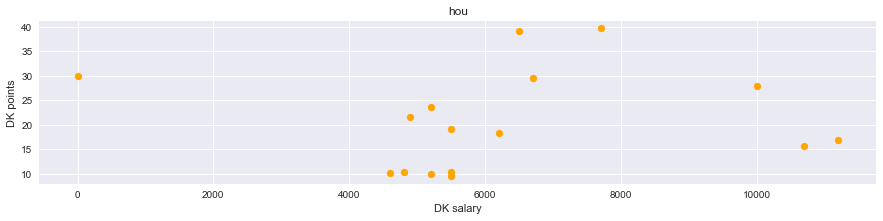

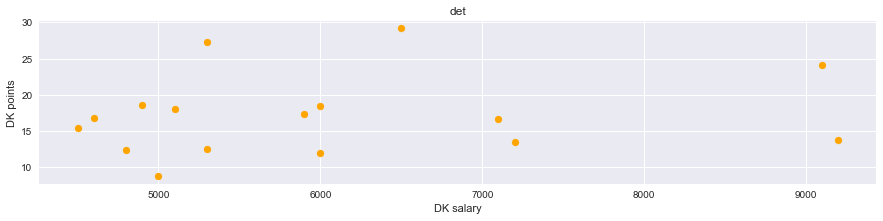

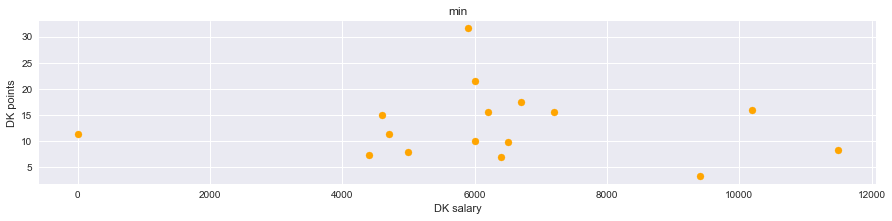

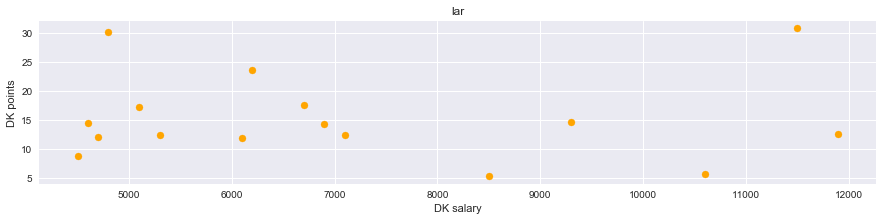

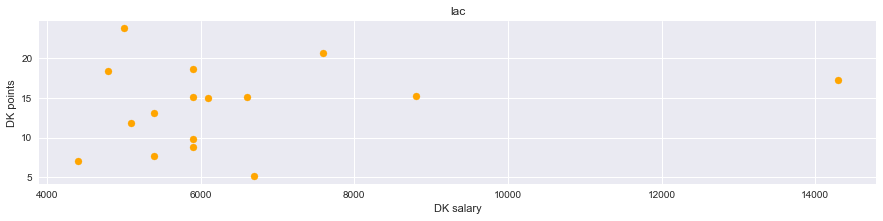

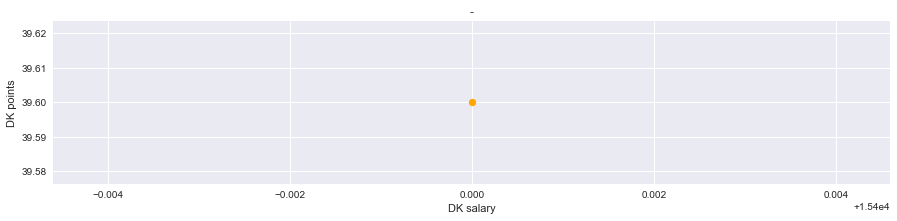

In [48]:
for opp in df_scrape['Oppt'].unique():
    x = df_scrape[(df_scrape['Oppt'] == opp) & (df_scrape['Pos'] == 'QB') & (df_scrape['Year'] == 2017)].groupby(['Week']).sum()[['DK points', 'DK salary']]
    plt.figure(figsize=(15,3))
    plt.title(opp)
    plt.xlabel('DK salary')
    plt.ylabel('DK points')
    plt.scatter(x['DK salary'], x['DK points'], color='orange')
    plt.show()

QB ~  
0.003141 x - 2.936
RB ~  
0.003112 x - 5.967
TE ~  
0.002854 x - 4.267
Def ~  
0.002329 x + 0.8163


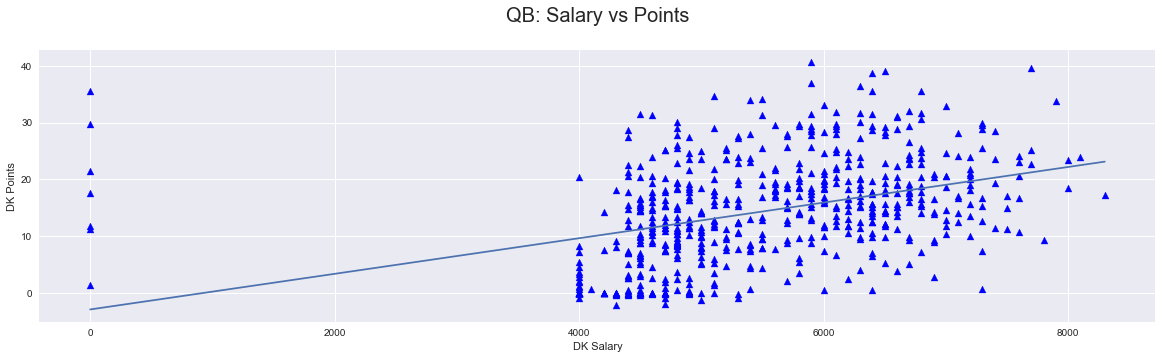

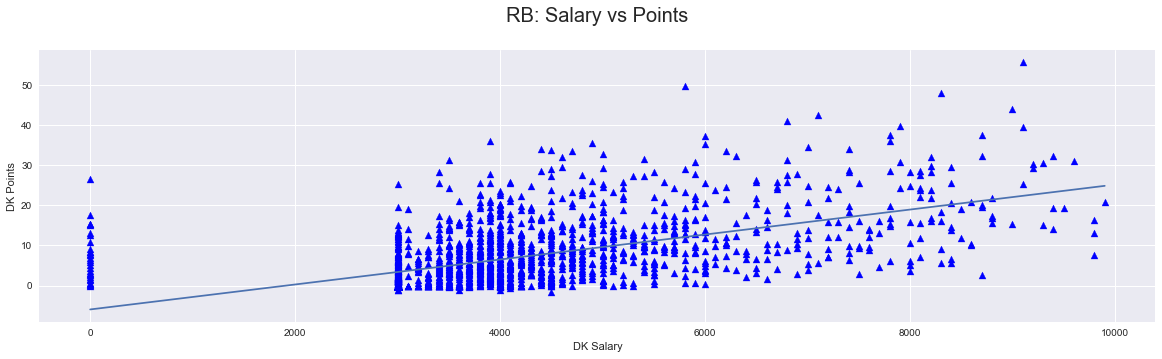

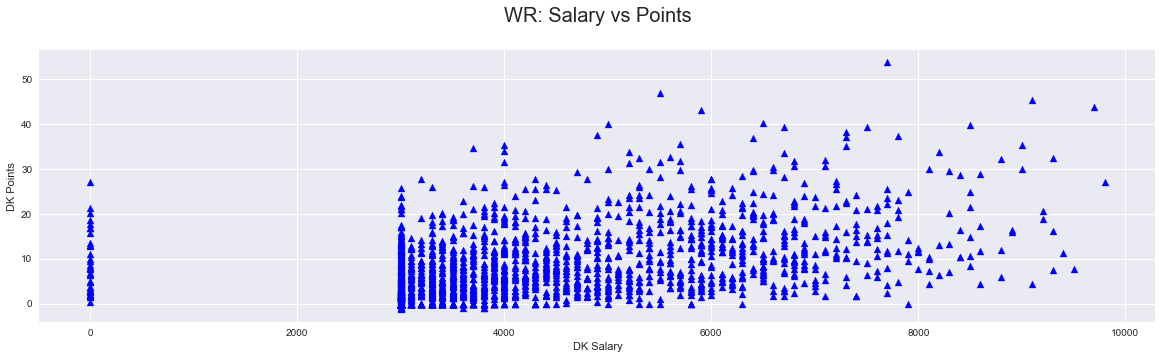

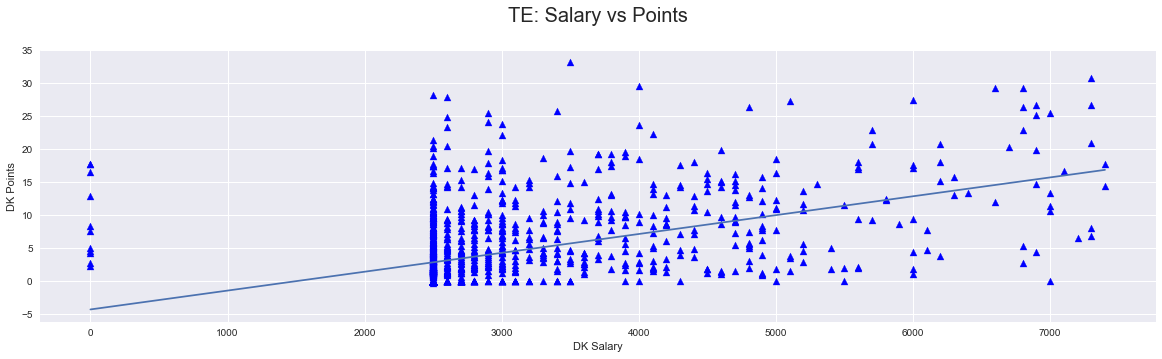

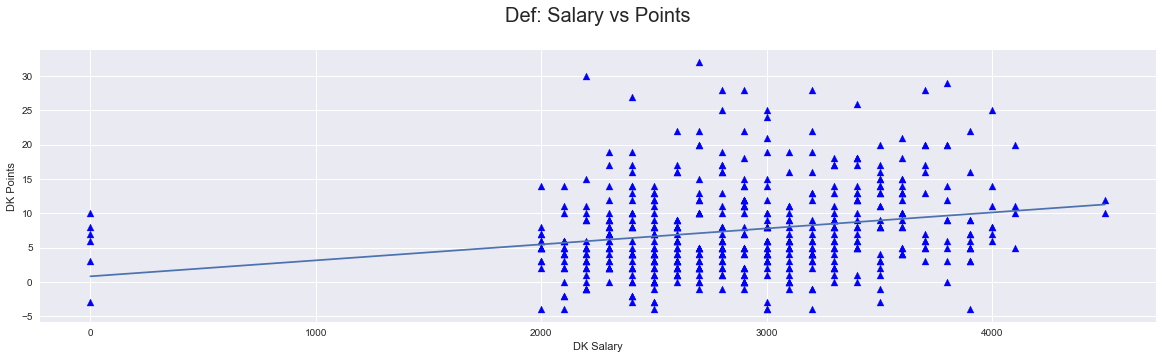

In [17]:
#look at salary distribution and DK points
for position in ['QB','RB','WR','TE','Def']:
    try:
        df_position = df_scrape[(df_scrape['Pos'] == position) & (df_scrape['Year'] == 2017)]
        plt.figure(figsize=(20,5))
        plt.scatter(df_position['DK salary'], df_position['DK points'], marker = '^', color='blue')
        plt.title(position+str(': Salary vs Points\n'), fontsize = 20)
        plt.xlabel('DK Salary')
        plt.ylabel('DK Points')
        print(position,"~",np.poly1d(np.polyfit(df_position['DK salary'], df_position['DK points'], 1)))
        plt.plot(np.unique(df_position['DK salary']), np.poly1d(np.polyfit(df_position['DK salary'], 
                 df_position['DK points'], 1))(np.unique(df_position['DK salary'])))
    except:
        pass

In [49]:
df_scrape.groupby(['Year','Week']).count()

GID  Name  Pos  Team  h/a  Oppt  DK points  DK salary
Year Week                                                       
2014 1     418   418  418   418  418   418        418        417
     2     429   429  429   429  429   429        429        429
     3     437   437  437   437  437   437        437        437
     4     352   352  352   352  352   352        352        352
     5     406   406  406   406  406   406        406        406
     6     403   403  403   403  403   403        403        402
     7     406   406  406   406  406   406        406        406
     8     405   405  405   405  405   405        405        405
     9     356   356  356   356  356   356        356        355
     10    356   356  356   356  356   356        356        356
     11    370   370  370   370  370   370        370        370
     12    399   399  399   399  399   399        399        399
     13    434   434  434   434  434   434        434        433
     14    434   434  434   434  434   434        434        434
     15    435   435  435   435  435   435        435        435
     16    430   430  430   430  430   430        430        430
     17    435   435  435   435  435   435        435        434
2015 1     424   424  424   424  424   424        424        424
     2     431   431  431   431  431   431        431        431
     3     425   425  425   425  425   425        425        425
     4     393   393  393   393  393   393        393        393
     5     375   375  375   375  375   375        375        375
     6     378   378  378   378  378   378        378        377
     7     374   374  374   374  374   374        374        373
     8     380   380  380   380  380   380        380        380
     9     345   345  345   345  345   345        345        345
     10    378   378  378   378  378   378        378        378
     11    367   367  367   367  367   367        367        367
     12    432   432  432   432  432   432        432        431
     13    430   430  430   430  430   430        430        430
     14    435   435  435   435  435   435        435        435
     15    438   438  438   438  438   438        438        437
     16    427   427  427   427  427   427        427        426
     17    428   428  428   428  428   428        428        424
2016 1     398   398  398   398  398   398        398        398
     2     429   429  429   429  429   429        429        428
     3     422   422  422   422  422   422        422        422
     4     396   396  396   396  396   396        396        396
     5     356   356  356   356  356   356        356        356
     6     402   402  402   402  402   402        402        402
     7     394   394  394   394  394   394        394        393
     8     343   343  343   343  343   343        343        342
     9     354   354  354   354  354   354        354        354
     10    381   381  381   381  381   381        381        381
     11    379   379  379   379  379   379        379        378
     12    429   429  429   429  429   429        429        429
     13    400   400  400   400  400   400        400        398
     14    428   428  428   428  428   428        428        428
     15    426   426  426   426  426   426        426        426
     16    419   419  419   419  419   419        419        417
     17    424   424  424   424  424   424        424        421
2017 1     398   398  398   398  398   398        398        397
     2     420   420  420   420  420   420        420        420
     3     428   428  428   428  428   428        428        427
     4     431   431  431   431  431   431        431        430
     5     353   353  353   353  353   353        353        352
     6     374   374  374   374  374   374        374        373
     7     411   411  411   411  411   411        411        411
     8     353   353  353   353  353   353        353        352
     9     352   352  352   352  352   352    